In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("Salary_Data.csv")

In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
x = df['YearsExperience']
y = df['Salary']
x = np.c_[x]

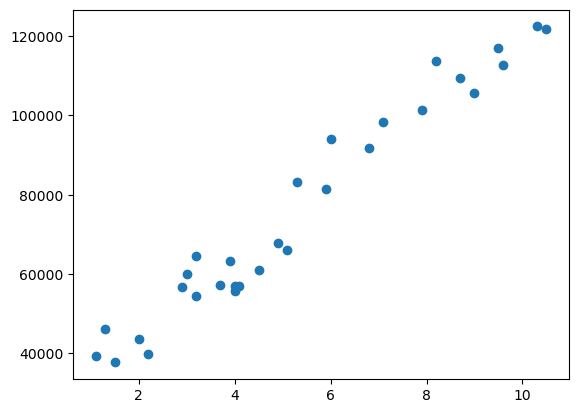

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [12]:
LR.intercept_ #c

25792.20019866871

In [13]:
LR.coef_   #m

array([9449.96232146])

In [14]:
y_pred = LR.predict(x)

In [15]:
new_x = [[7]]
predicted_salary = LR.predict(new_x)
print(f'predicted salary: {predicted_salary[0]}')

predicted salary: 91941.93644885423


In [16]:
error = y - y_pred

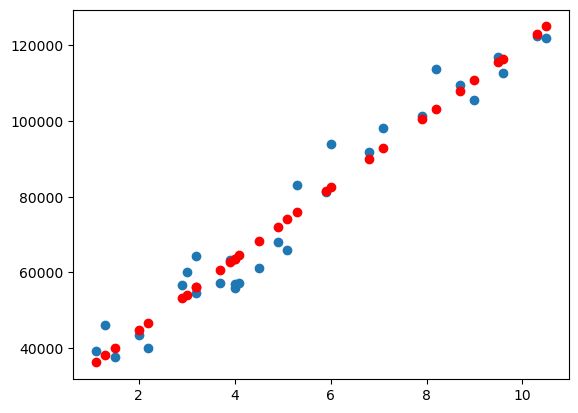

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.scatter(x,y_pred,color='red')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("Mean squarred error:",mse.round(3))
print("Root Mean squarred error:",np.sqrt(mse).round(3))

Mean squarred error: 31270951.722
Root Mean squarred error: 5592.044


In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("R square:",r2.round(2))

R square: 0.96


In [20]:
#extract the true and predicted values
y_true = df['YearsExperience'].values
y_pred = df['Salary'].values

In [21]:
# apply log transformation
y_true_log = np.log(y_true)
y_pred_log = np.log(y_pred)

In [22]:
#apply square transformation
y_true_square = np.square(y_true)
y_pred_square = np.square(y_pred)

In [23]:
# apply square root transformation
y_true_sqrt = np.sqrt(y_true) 
y_pred_sqrt = np.sqrt(y_pred)

In [24]:
# calculate RMSE for each transformation
rmse_log = np.sqrt(mean_squared_error(y_true_log, y_pred_log))
rmse_square = np.sqrt(mean_squared_error(y_true_square,y_pred_square))
rmse_sqrt = np.sqrt(mean_squared_error(y_true_sqrt, y_pred_sqrt))

In [25]:
print("RMSE:",rmse_log)

RMSE: 9.673374949151341


In [26]:
print("RMSE:",rmse_square)

RMSE: 7839290591.726188


In [27]:
print("RMSE:",rmse_sqrt)

RMSE: 273.3956330045528
